In [16]:
import openpyxl
import requests
import warnings

import pandas as pd

from PIL import Image
from io import BytesIO
from tqdm import tqdm

%matplotlib inline
warnings.filterwarnings(action='ignore')

In [17]:
# 이미지를 불러오는 함수
def get_img_from_url(url: str) -> Image:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [18]:
df = pd.read_excel("./temp_color.xlsx", engine='openpyxl')

In [44]:
df['mid_class'].unique()

array(['트러커 재킷', '맨투맨/스웨트셔츠', '데님 팬츠', '백팩', '캔버스/단화', '트레이닝/조거 팬츠',
       '패션스니커즈화', '슈트/블레이저 재킷', '셔츠/블라우스', '후드 집업', '숏 팬츠', '반소매 티셔츠',
       '토트백', '기타 스니커즈', '후드 티셔츠', '로퍼', '숏패딩/숏헤비 아우터', '긴소매 티셔츠',
       '캡/야구 모자', '겨울 더블 코트', '슈트 팬츠/슬랙스', '헌팅캡/베레모', '겨울 싱글 코트',
       '피케/카라 티셔츠', '블로퍼', '니트/스웨터', '블루종/MA-1', '사파리/헌팅 재킷', '메신저/크로스 백',
       '부츠', '비니', '레더/라이더스 재킷', '베스트', '카디건', '겨울 기타 코트', '구두',
       '플리스/뽀글이', '코튼 팬츠', '나일론/코치 재킷', '스포츠가방', '기타 아우터', '웨이스트 백',
       '트레이닝 재킷', '스포츠신발', '샌들', '환절기 코트', '무스탕/퍼', '스타디움 재킷', '슬리퍼',
       '롱패딩/롱헤비 아우터', '숄더백', '파우치 백', '브리프케이스', '버킷/사파리햇', '기타 바지',
       '모카신/보트 슈즈', '클러치 백', '아노락 재킷', '패딩 베스트', '농구화', '민소매 티셔츠', '크로스백',
       '트루퍼'], dtype=object)

In [41]:
len(df['color_id'].unique())

184

In [19]:
from collections import Counter
res = Counter(df['color_id'])
res.most_common()

[(0, 102),
 (273, 92),
 (546, 81),
 (1365, 54),
 (3549, 46),
 (274, 42),
 (3822, 35),
 (547, 30),
 (819, 21),
 (290, 19),
 (1092, 18),
 (1621, 18),
 (3550, 17),
 (3548, 15),
 (3821, 14),
 (2712, 13),
 (2730, 13),
 (1364, 12),
 (1620, 12),
 (2985, 11),
 (1893, 11),
 (17, 10),
 (3804, 10),
 (1637, 9),
 (3805, 9),
 (1383, 7),
 (3532, 7),
 (1603, 7),
 (1110, 7),
 (2729, 7),
 (2986, 7),
 (291, 7),
 (3002, 7),
 (2984, 6),
 (1638, 6),
 (3276, 6),
 (1892, 6),
 (1877, 6),
 (2968, 5),
 (2457, 5),
 (2474, 5),
 (2731, 5),
 (2713, 5),
 (3823, 5),
 (563, 5),
 (1093, 5),
 (3566, 4),
 (2456, 4),
 (3294, 4),
 (1109, 4),
 (3277, 4),
 (2439, 4),
 (1639, 4),
 (1384, 4),
 (1366, 4),
 (2202, 4),
 (4095, 4),
 (2696, 4),
 (1348, 4),
 (2148, 4),
 (530, 4),
 (2746, 3),
 (3275, 3),
 (2711, 3),
 (1907, 3),
 (4078, 3),
 (803, 3),
 (3240, 3),
 (2458, 3),
 (3022, 3),
 (1636, 3),
 (1111, 3),
 (1, 3),
 (1876, 3),
 (1347, 3),
 (2475, 2),
 (3547, 2),
 (1947, 2),
 (3531, 2),
 (2440, 2),
 (2150, 2),
 (855, 2),
 (3278, 2),

In [34]:
# top_df = df.loc[(df['big_class'] == '상의') & (df['mid_class'] == '맨투맨/스웨트셔츠')]
color_top = df.groupby('color_id')['img_url'].apply(list)

In [36]:
len(list(color_top.keys())

[0,
 1,
 17,
 18,
 37,
 50,
 52,
 257,
 273,
 274,
 275,
 289,
 290,
 291,
 390,
 530,
 532,
 546,
 547,
 562,
 563,
 565,
 602,
 769,
 785,
 802,
 803,
 819,
 837,
 839,
 852,
 854,
 855,
 858,
 872,
 888,
 1041,
 1042,
 1058,
 1090,
 1091,
 1092,
 1093,
 1094,
 1109,
 1110,
 1111,
 1112,
 1126,
 1127,
 1128,
 1129,
 1347,
 1348,
 1363,
 1364,
 1365,
 1366,
 1379,
 1382,
 1383,
 1384,
 1400,
 1451,
 1468,
 1571,
 1602,
 1603,
 1604,
 1619,
 1620,
 1621,
 1635,
 1636,
 1637,
 1638,
 1639,
 1653,
 1655,
 1657,
 1875,
 1876,
 1877,
 1892,
 1893,
 1894,
 1907,
 1909,
 1910,
 1945,
 1946,
 1947,
 2114,
 2130,
 2131,
 2132,
 2147,
 2148,
 2149,
 2150,
 2166,
 2185,
 2201,
 2202,
 2219,
 2220,
 2305,
 2370,
 2439,
 2440,
 2456,
 2457,
 2458,
 2459,
 2474,
 2475,
 2492,
 2627,
 2644,
 2696,
 2711,
 2712,
 2713,
 2728,
 2729,
 2730,
 2731,
 2746,
 2747,
 2951,
 2952,
 2953,
 2965,
 2966,
 2967,
 2968,
 2969,
 2982,
 2983,
 2984,
 2985,
 2986,
 3001,
 3002,
 3003,
 3022,
 3138,
 3218,
 3224,
 3

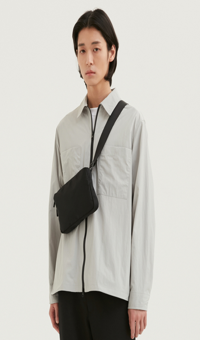

https://image.msscdn.net/images/goods_img/20200130/1284163/1284163_3_500.jpg?t=20200311153317


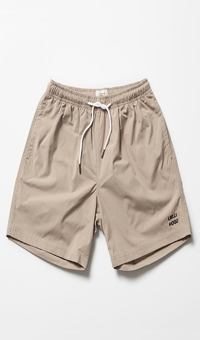

https://image.msscdn.net/images/goods_img/20160310/317826/317826_1_500.jpg?t=20160310220754


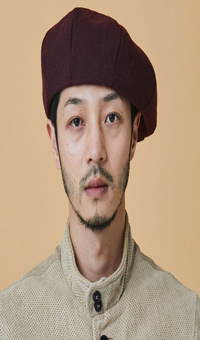

https://image.msscdn.net/images/goods_img/20171103/665198/665198_3_500.jpg?t=20190501004137


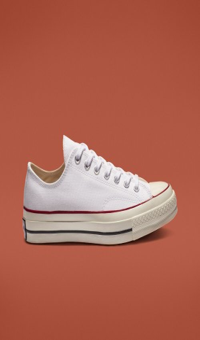

https://image.msscdn.net/images/goods_img/20180703/810036/810036_2_500.jpg?t=20200428163528


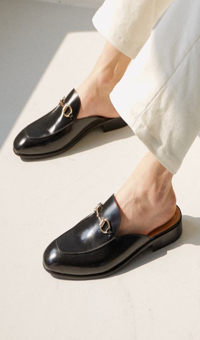

https://image.msscdn.net/images/goods_img/20170711/589285/589285_1_500.jpg?t=20200624121739


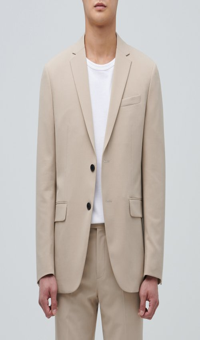

https://image.msscdn.net/images/goods_img/20200219/1312179/1312179_2_500.jpg?t=20210705141450


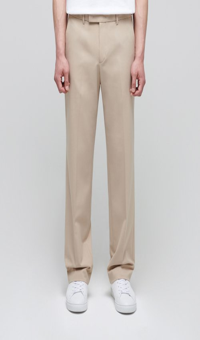

https://image.msscdn.net/images/goods_img/20200219/1312047/1312047_2_500.jpg?t=20210705122741


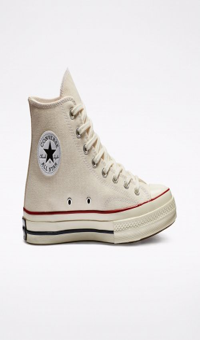

https://image.msscdn.net/images/goods_img/20180703/810031/810031_3_500.jpg?t=20200428170711


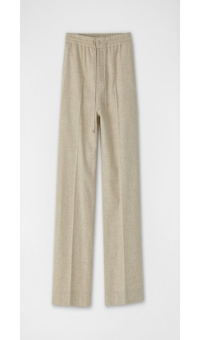

https://image.msscdn.net/images/goods_img/20210823/2080741/2080741_1_500.jpg?t=20210901161237


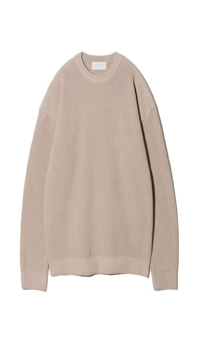

https://image.msscdn.net/images/goods_img/20190904/1142318/1142318_7_500.jpg?t=20210219104232


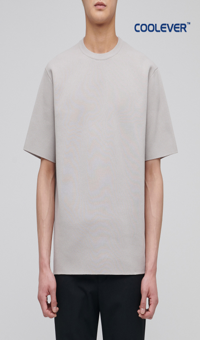

https://image.msscdn.net/images/goods_img/20200304/1333727/1333727_2_500.jpg?t=20200305184542


In [39]:
for url in color_top[2985]:
    img = get_img_from_url(url)
    img = img.resize((200, 340))
    display(img)
    print (url, flush=True)